<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />


## GBI6-2021II: BIOINFORMÁTICA

**Bonilla, Marjorie** 

**18-02-2021**

## Ejercicio 1 
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
      

In [1]:
import miningscience as msc 
help(msc.download_pubmed)
help(msc.mining_pubs)


Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    La función input se usa como función de entrada arrojando  como resultado una lista de todos mis id de la busqueda en pubmed

Help on function mining_pubs in module miningscience:

mining_pubs(tipo, lectura)
    Se necesitan tres variables "DP", "AU","AD" en la función para que de resultado se muestre una dataframe




## Ejercicio 2 


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` 

Primero se instalo el paquete "!pip install biopython !pip install reportlab !pip install nglview" y luego se corrió los comandos

In [2]:
import re
journals = msc.download_pubmed("Ecuador Genomics[title/abstract]")
PMID=re.findall("[DIMP]{4}\-.*\n",journals)
print ("El numero de articulos es:", len(PMID)) 

print ("El PMID del primer articulo es:", PMID[0])


El numero de articulos es: 55
El PMID del primer articulo es: PMID- 35120121



## Ejercicio 3

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Se muestra los dos primeros y los dos últimos registros de cada dataframe. 

In [3]:
import miningscience as msc
pub_año = msc.mining_pubs("DP",journals)
print (pub_año.head(2))
print (pub_año.tail(2))
pub_autor = msc.mining_pubs("AU",journals)
print (pub_autor.head(2))
print (pub_autor.tail(2))
countries = msc.mining_pubs("AD",journals)
print (countries.head(2))
print (countries.tail(2))

       PMID Año de publicación
0  35120121               2022
1  35064679               2022
        PMID Año de publicación
53  19844075               2010
54  19018989               2008
       PMID  Numero de autores
0  35120121                 14
1  35064679                  7
        PMID  Numero de autores
53  19844075                  2
54  19018989                  7
      pais  numero de autores
0  Ecuador                 72
1       UK                 23
      pais  numero de autores
37   Kenya                  3
38  Malawi                  2


## Ejercicio 4 

Realice la visualización de los datos del ejercicio 3. 


La media es:  2018.9272727272728
La desviación estandar es:  2.872955282261117


Text(0, 0.5, 'Repeticiones')

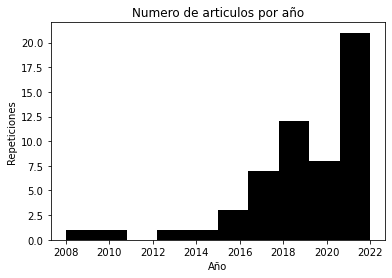

In [4]:
import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter
pub_año["Año de publicación"] = pub_año["Año de publicación"].astype("int")
mean_py = pub_año["Año de publicación"].mean()
sd_py = pub_año["Año de publicación"].std()
print ("La media es: ", mean_py)
print ("La desviación estandar es: ", sd_py)
#print (pub_year["Año de publicación"])
intervalos = range(min(pub_año["Año de publicación"]), max(pub_año["Año de publicación"]))
plot.hist(x=pub_año["Año de publicación"], color = "black")
plot.title("Numero de articulos por año")
plot.xlabel("Año")
plot.ylabel("Repeticiones")

Text(0, 0.5, 'Frecuencia')

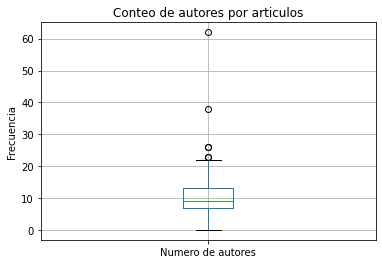

In [6]:
boxplot = pub_autor[0:827].boxplot(column=["Numero de autores"])
plot.title("Conteo de autores por articulos")
plot.ylabel("Frecuencia")

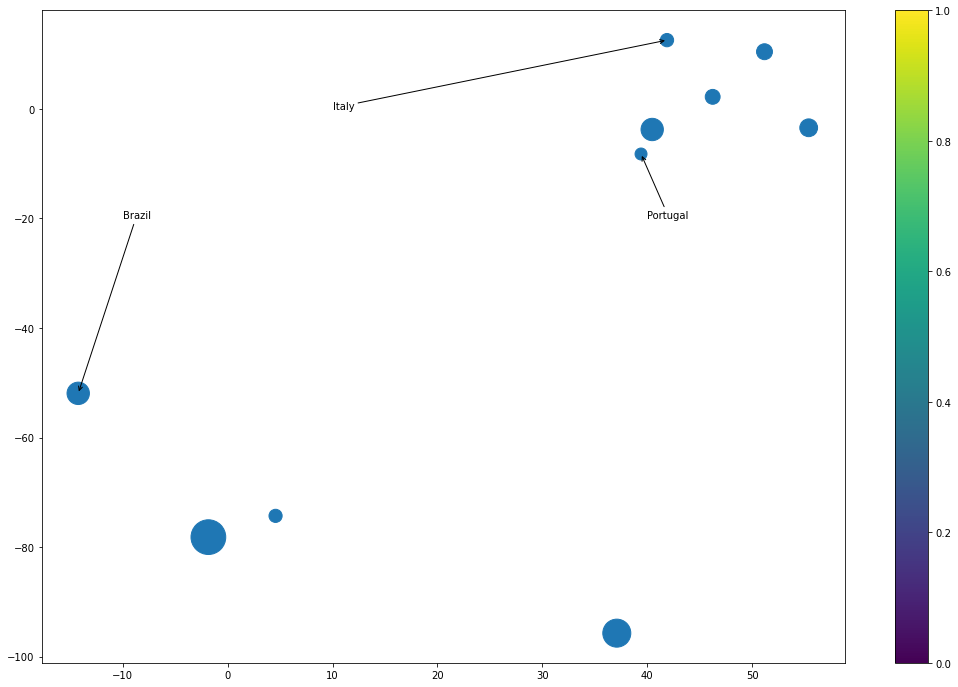

In [7]:
countries = countries.sort_values("numero de autores")
max_pais = (countries[104:])

countries_lat = [39.399872, 4.570868, 41.87194, 46.227638, 51.165691, 55.378051, 
                40.463667, -14.235004, 37.09024, -1.831239  ] 
                 
countries_long = [-8.224454, -74.297333, 12.56738, 2.213749, 10.451526, -3.435973,  
                 -3.74922, -51.92528, -95.712891, -78.183406]
repeticiones = [143, 173, 177, 221, 253, 316, 499, 501, 784, 1206]

import matplotlib.pyplot as plot
%matplotlib inline

plot.scatter(countries_lat, countries_long, repeticiones) 
plot.colorbar()
ard = dict(arrowstyle="->")
plot.annotate("Italy", xy = (41.87194, 12.56738 ), 
             xytext = (10,0), arrowprops = ard) 
plot.annotate("Portugal", xy= (39.399872, -8.224454), 
            xytext = (40, -20), arrowprops = ard)
plot.annotate("Brazil", xy= (-14.235004, -51.92528), 
            xytext = (-10, -20), arrowprops = ard)
params = plot.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plot.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

#### El histograma indica que ha existido un crecimiento exponencial del numero de articulos relacionados a Ecuador desde 1975 hasta la actualidad ...cambiar

#### La media del numero de autores es cerca de 5 a 10, ademas existen varios articulos que estan fuera del limite superior .. cambiar

#### En el grafico de puntos se muestra a los 10 paises que mas numero de autores presentaban y con etiqueta de flechas se indica a los primeros cuatro Ecuador, USA, Brazil y España respectivamente. 
... parafrasear


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [51]:
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Entrez
from Bio import SeqIO
from Bio import GenBank 
import csv 
import re 

with open("a_list.seq", errors="ignore") as file: 
    texto_1 = file.read()
accession = texto_1.split("\n")
Entrez.email="rossana.parra@est.ikiam.edu.ec"
archivo = open("secuencias.txt", "w")
for i in accession[0:10]: 
    handle=Entrez.efetch(db="nuccore", id=i, rettype="fasta")
    archivo.write(handle.read())
with open("alineacion.txt", "r") as f: 
    alignment = AlignIO.read(f, "clustal")
calculator = DistanceCalculator("identity")
distance_matriz = calculator.get_distance(alignment)
constructor = DistanceTreeConstructor(calculator)
tree = constructor.build_tree(alignment)
tree.rooted = True 
Phylo.draw_ascii(tree)


     _____________________________ LC595961.1
  __|
 |  |_____________________________ MF036303.1
 |
 |                                _ LC595949.1
 |       ________________________|
 |      |                        |_ OK185356.1
 |______|
_|      |                           ____________________ MZ736440.1
 |      |__________________________|
 |                                 |______________________________ MF036277.1
 |
 |                                       ________________________ LC595890.1
 |          ____________________________|
 |      ___|                            | MZ736467.1
 |     |   |
 |_____|   |_____________________________ OK267372.1
       |
       |______________________________________________________ LC595840.1



### En la imagen del arbol filogenetico se puede observar que existen 6 clados y que las secuencias con los MZ736440.1 y MZ736440.1 son las que tienen mayor similitud

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```